In [2]:
import pandas as pd
import numpy as np
import collections
import copy
import random
import matplotlib.pyplot as plt
from nlp.preprocessing import (
    clean_text,
    preprocess,
    tokenize,
    preprocess_document,
    tokenize_document,
    get_stopwords, 
    lemmatization_document,
    get_canonical_words)
from nlp.utils import (
    plot_histogram,
    get_completetext,
    plot_wordcloud,
    print_statistics,
    groups_frequency_sort)
from nlp.text_statistics import (
    count_tokens,
    unique_tokens
)
from nlp.grouping import (
    get_groups,
    get_groups_size,
    get_unigram_groups,
    get_two_tokens_groups,
    get_first_token_groups,
    get_bigram_groups,
    get_first_two_groups,
    groups_frequency_sort
)
from utils.read_files import (
    get_items)
from item.item_list import (
    ItemList,
    Item
)
from item.spellcheckeropt import SpellcheckerOpt
from item.utils import get_tokens_set
from textpp_ptbr.preprocessing import TextPreProcessing as tpp
from gensim.parsing.preprocessing import (
    strip_multiple_whitespaces,
    strip_non_alphanum,
    strip_punctuation2,
    strip_short)

In [7]:
#-----------------INICIO DOS COMENTARIOS--------------------------------------

file1 = '../dados/itens_pregao_pitem_saude.csv'
print(file1)
#items = get_items(file1)
items = pd.read_csv(file1,sep=';')
items.head()

len(items)

items[:10]

items_descriptions = []
stopwords_ = get_stopwords()
canonical_form, word_class = get_canonical_words()

for item in items:
    description = item[0]
    price = item[1]
    dsc_unidade = item[2]
    if type(dsc_unidade) == str:
        dsc_unidade = tpp.remove_accents(dsc_unidade.lower())
    doc = preprocess_document(description, remove_numbers=False)
    doc = tokenize_document(doc, stopwords_)
#     doc = lemmatization_document(doc, canonical_form)
    items_descriptions.append((doc, price, dsc_unidade, description))

count = 0
stopwords_ = get_stopwords()
not_str = 0

for item in items_descriptions:
    dsc_unidade = item[2]
    if type(dsc_unidade) == str:
        tokens = tokenize_document(dsc_unidade, stopwords_)
        flag = False
        for tok in tokens:
            if tok == 'servico' or tok == 'prestacao':
                flag = True
                break
        if flag:
            count += 1
    else:
        not_str += 1

count

itemlist = ItemList()
itemlist.load_items_from_list(items_descriptions)

itemlist.save_items('../dados/items_preprocessed')

In [ ]:
#---------------------------FIM DOS COMENTARIOS-----------------------------------

In [2]:
itemlist = ItemList()
itemlist.load_items_from_file('../dados/items_preprocessed.zip')

servicos = ItemList()
newitems = ItemList()

for item in itemlist.items_list:
    item_dict = item.get_item_dict()
    flag = False
    for tok in item_dict['palavras']:
        if tok == 'servico' or tok == 'prestacao' or tok == 'servicos' or tok == 'prestacoes':
            flag = True
            break
    if flag:
        servicos.items_list.append(item)
    else:
        newitems.items_list.append(item)

In [8]:
len(servicos.items_list)

21520

In [9]:
len(newitems.items_list)

1508992

In [10]:
servicos.save_items('../dados/items_preprocessed_servicos_wolemmatization')

In [11]:
newitems.save_items('../dados/items_preprocessed_wolemmatization')

In [ ]:
sample = random.sample(newitems.items_list, 200)

In [ ]:
sample_items = ItemList()

for item in sample:
    sample_items.items_list.append(item)

In [ ]:
sample_items.save_items('../dados/sample_200items')

In [ ]:
len(itemlist.items_list)

In [ ]:
items_list = itemlist.items_list

In [ ]:
count = 0

for item in items_list:
    item_dict = item.get_item_dict()
    if len(item_dict['quantidade']) != 0:
        count += 1
        
count

In [ ]:
count = 0

for item in items_list:
    item_dict = item.get_item_dict()
    flag = False
    for tok in item_dict['palavras']:
        if tok == 'servico' or tok == 'prestacao':
            flag = True
            break
            
    if flag:
        count += 1
        
count

In [ ]:
len(items_list)

In [ ]:
items_list[478432].print_item()

In [3]:
first_token_groups = itemlist.get_first_token_groups()

In [4]:
len(first_token_groups)

18035

In [5]:
groups = list(first_token_groups.keys())

In [6]:
groups[:10]

['colagenase',
 'campo',
 'kit',
 'tinta',
 'termometro',
 'diclofenaco',
 'panfleto',
 'bota',
 'ciprofloxacino',
 'dea']

In [7]:
firstt_groups_size = itemlist.get_groups_size(first_token_groups)

In [8]:
items_group_size = []

for group_size in firstt_groups_size:
    for i in range(group_size):
        items_group_size.append(group_size)

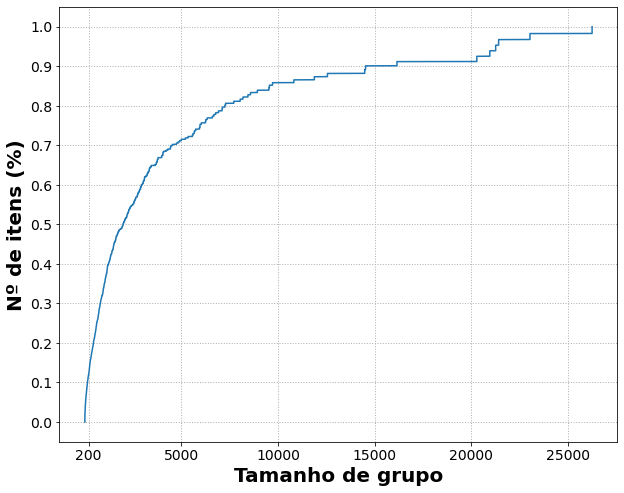

<Figure size 432x288 with 0 Axes>

In [9]:
from statsmodels.distributions.empirical_distribution import ECDF

# fit a cdf
ecdf = ECDF(items_group_size)

fig, (axis1) = plt.subplots(figsize=(10,8))
x_label = 'Tamanho de grupo'
y_label = 'Nº de itens (%)'


# kwargs = {'cumulative': True}
# sns.distplot(vlr_recurso, hist_kws=kwargs, kde_kws=kwargs)
plt.plot(ecdf.x, ecdf.y)

axis1.set_xticks([200, 5000, 10000, 15000, 20000, 25000])
axis1.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

axis1.set_xlabel(x_label, fontsize=20, weight='bold')
axis1.set_ylabel(y_label, fontsize=20, weight='bold')

plt.grid(axis='both', linestyle=':', linewidth=1.0)
# axis1.legend(loc='upper right')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.show()
plt.clf()

In [10]:
i = 0
for v in ecdf.x:
    if v >= 40.0:
        print(100*ecdf.y[i])
        break
    i += 1

4.925666954527306


In [11]:
len(items_group_size)

1507674

In [12]:
firstt_groups_size.count(1)

6337

In [13]:
firstt_groups_size.sort(reverse=True)

In [14]:
firstt_groups_size[:10]

[26250, 23035, 21414, 21261, 20958, 20285, 16153, 14528, 14484, 12557]

In [15]:
group_sample = []

for group, items in first_token_groups.items():
    size = len(items)
    if size > 5000:
        group_sample.append(group)

group_sample[:10]

['kit',
 'tinta',
 'papel',
 'pincel',
 'filtro',
 'cola',
 'fio',
 'mascara',
 'oleo',
 'broca']

In [16]:
firstt_groups_names_size = groups_frequency_sort(first_token_groups)

In [17]:
firstt_groups_names_size[:10]

[('jta', [1508526]),
 ('antestreptolisina', [1508229]),
 ('restaur', [1508127]),
 ('desloratadina0', [1508044]),
 ('prednisilona', [1507974]),
 ('cabanagem', [1507813]),
 ('transferido', [1506232]),
 ('beserol', [1504793]),
 ('multiestacao', [1504658]),
 ('tramela', [1504585])]

In [18]:
print_statistics(firstt_groups_size)

Mean: 83.59711671749376
First quartile: 1.0
Median: 2.0
Third quartile: 9.0
Std: 626.0059554066606
Var: 391883.4562046059
Max: 26250
Min: 1.0


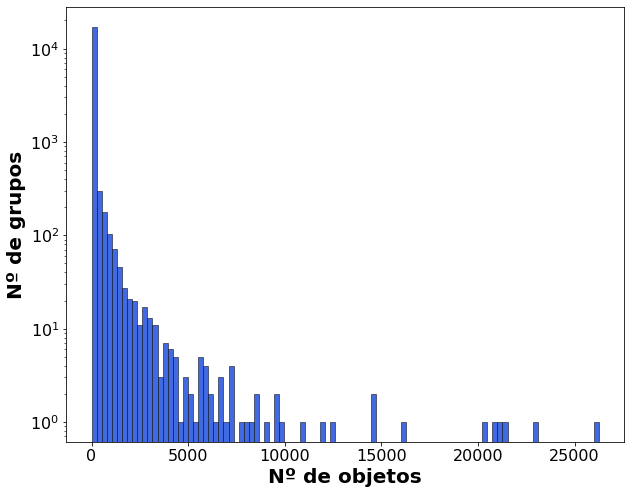

<Figure size 432x288 with 0 Axes>

In [19]:
plot_histogram(firstt_groups_size, 100, 'Nº de objetos', 'Nº de grupos', log=True)

In [20]:
count_interval = {}
count_interval['1'] = 0
count_interval['(1,5]'] = 0
count_interval['(5,10]'] = 0
count_interval['(10,100]'] = 0
count_interval['(100,1000]'] = 0
count_interval['(1000,5000]'] = 0
count_interval['(5000,10000]'] = 0
count_interval['>10000'] = 0

In [21]:
for p in firstt_groups_size:

    if p == 1:
        count_interval['1'] += 1
    elif p > 1 and p <= 5:
        count_interval['(1,5]'] += 1
    elif p > 5 and p <= 10:
        count_interval['(5,10]'] += 1
    elif p > 10 and p <= 100:
        count_interval['(10,100]'] += 1
    elif p > 100 and p <= 1000:
        count_interval['(100,1000]'] += 1
    elif p > 1000 and p <= 5000:
        count_interval['(1000,5000]'] += 1
    elif p > 5000 and p <= 10000:
        count_interval['(5000,10000]'] += 1
    else:
        count_interval['>10000'] += 1

In [22]:
total = 0
lines = []
aux = 0
for interval, value in count_interval.items():
    print(interval, ':', value)
    for i in range(0, value):
        lines.append([interval])
        aux += 1
    total += value

1 : 6337
(1,5] : 6031
(5,10] : 1489
(10,100] : 2714
(100,1000] : 1141
(1000,5000] : 280
(5000,10000] : 31
>10000 : 12


In [23]:
intervals_df = pd.DataFrame(lines, columns=["Preço"])
intervals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18035 entries, 0 to 18034
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Preço   18035 non-null  object
dtypes: object(1)
memory usage: 141.0+ KB


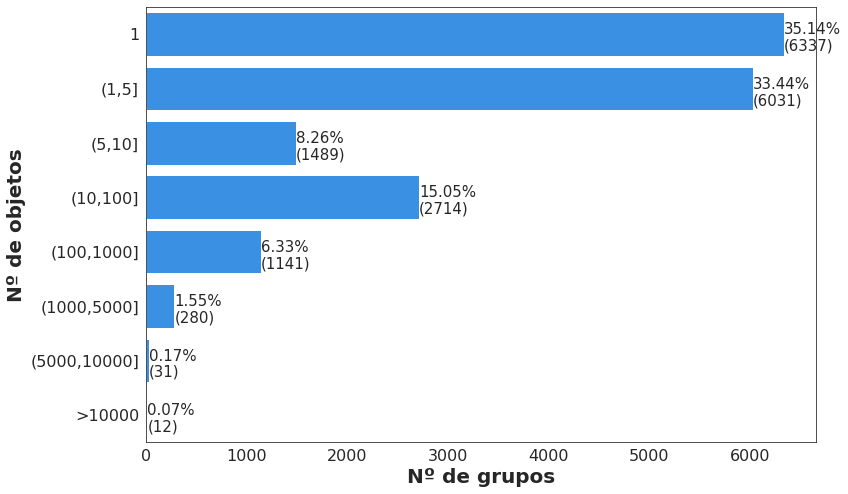

<Figure size 432x288 with 0 Axes>

In [24]:
import seaborn as sns
sns.set_style("white")

fig, (axis1) = plt.subplots(figsize=(12,8))

sns.countplot(y="Preço", data=intervals_df, color='dodgerblue')

axis1.set_xlabel("Nº de grupos", fontsize=20, weight='bold')
axis1.set_ylabel("Nº de objetos", fontsize=20, weight='bold')
plt.grid(False)

total = len(intervals_df)
for p in axis1.patches:
    width = p.get_width()
    axis1.text(width, p.get_y()+0.7, '(%d)'%(width), fontsize=15)
    axis1.text(width, p.get_y()+0.4, '%.2f%%'%(100*float(width)/total), fontsize=15)

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

plt.show()
plt.clf()

In [ ]:
words = get_tokens_set('../dados/palavras/words_cbras_preprocess.txt')

groups_names = [group for group, items in first_token_groups.items()]

In [ ]:
spellchecker = SpellcheckerOpt()
spellchecker.load_words(groups_names)

In [ ]:
words_checked = 0
similar_words = {}
distance = 2
verbose = True

for word in groups_names:
    words_list = spellchecker.search(word, distance)
    words_list.sort(key=lambda x:(x[1], x[0]))
    similar_words[word] = words_list
    words_checked += 1
    if verbose and words_checked%1000 == 0:
        print('%d words checked' % (words_checked))

In [ ]:
similar_words['filtro']

In [ ]:
count = 0
regrouped = 0

count_one = 0
regrouped_one = 0

for group, items in first_token_groups.items():
    if group not in words:
        count += 1
        new_group = None
        for word, dist in similar_words[group]:
            if word in words:
                new_group = word
                break
        if new_group != None and new_group != group:
            regrouped += 1
            first_token_groups[new_group] += items
            first_token_groups[group] = []

print(count)
print(regrouped)

In [ ]:
len(first_token_groups)

In [ ]:
new_groups = {}
for group, items in first_token_groups.items():
    if len(items) > 0:
        new_groups[group] = items

In [ ]:
len(new_groups)

In [ ]:
new_groups_sizes = []

for group, items in new_groups.items():
    new_groups_sizes.append(len(items))

In [ ]:
new_groups_sizes.count(1)

In [ ]:
groups = itemlist.regroup_first_token_groups(first_token_groups, verbose=True)

In [ ]:
len(groups)

In [ ]:
firstt_groups_size = itemlist.get_groups_size(groups)

In [ ]:
firstt_groups_size.count(1)

In [ ]:
firstt_groups_size.sort(reverse=True)

In [ ]:
firstt_groups_size[:10]

In [ ]:
group_sample = []

for group, items in groups.items():
    size = len(items)
    if size > 5000:
        group_sample.append(group)

group_sample[:10]

In [ ]:
print_statistics(firstt_groups_size)

In [ ]:
plot_histogram(firstt_groups_size, 100, 'Nº de objetos', 'Nº de grupos', log=True)

In [ ]:
count_interval = {}
count_interval['1'] = 0
count_interval['(1,5]'] = 0
count_interval['(5,10]'] = 0
count_interval['(10,100]'] = 0
count_interval['(100,1000]'] = 0
count_interval['(1000,5000]'] = 0
count_interval['(5000,10000]'] = 0
count_interval['>10000'] = 0

In [ ]:
for p in firstt_groups_size:

    if p == 1:
        count_interval['1'] += 1
    elif p > 1 and p <= 5:
        count_interval['(1,5]'] += 1
    elif p > 5 and p <= 10:
        count_interval['(5,10]'] += 1
    elif p > 10 and p <= 100:
        count_interval['(10,100]'] += 1
    elif p > 100 and p <= 1000:
        count_interval['(100,1000]'] += 1
    elif p > 1000 and p <= 5000:
        count_interval['(1000,5000]'] += 1
    elif p > 5000 and p <= 10000:
        count_interval['(5000,10000]'] += 1
    else:
        count_interval['>10000'] += 1

In [ ]:
total = 0
lines = []
aux = 0
for interval, value in count_interval.items():
    print(interval, ':', value)
    for i in range(0, value):
        lines.append([interval])
        aux += 1
    total += value

In [ ]:
intervals_df = pd.DataFrame(lines, columns=["Preço"])
intervals_df.info()

In [ ]:
import seaborn as sns
sns.set_style("white")

fig, (axis1) = plt.subplots(figsize=(12,8))

sns.countplot(y="Preço", data=intervals_df, color='dodgerblue')

axis1.set_xlabel("Nº de grupos", fontsize=20, weight='bold')
axis1.set_ylabel("Nº de objetos", fontsize=20, weight='bold')
plt.grid(False)

total = len(intervals_df)
for p in axis1.patches:
    width = p.get_width()
    axis1.text(width, p.get_y()+0.7, '(%d)'%(width), fontsize=15)
    axis1.text(width, p.get_y()+0.4, '%.2f%%'%(100*float(width)/total), fontsize=15)

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

plt.show()
plt.clf()

In [ ]:
maxi = 0
maxi_group = None

for group, ids in groups.items():
    if len(ids) > maxi:
        maxi = len(ids)
        maxi_group = group

In [ ]:
maxi_group

In [ ]:
len(groups[maxi_group])

In [ ]:
groups[maxi_group][:10]

In [ ]:
itemlist.unique_words[:100]

similar_words = itemlist.get_similar_words(verbose=True)

len(similar_words)

itemlist.save_similar_words(similar_words, '../dados/similar_words')

In [ ]:
similar_words = itemlist.load_similar_words('../dados/similar_words.zip')

In [ ]:
group_test = 'servico'

In [ ]:
len(groups[group_test])

In [ ]:
items_distance = itemlist.get_items_distance(groups[group_test], similar_words, rank_size=10, verbose=True)

In [ ]:
len(items_distance)

In [ ]:
groups[group_test]

In [ ]:
items_sample = itemlist.get_group_items(groups[group_test])

In [ ]:
items_sample

In [ ]:
ventiladores_pulmonares = []

for i in range(0, len(items_sample)):
    item = items_sample[i]
    words = item.words
    if len(words) > 2 and words[0] == 'ventilador' and words[1] == 'pulmonar':
        ventiladores_pulmonares.append(groups['ventilador'][i])

In [ ]:
items_sample_words = itemlist.get_items_words(items_sample)

In [ ]:
items_sample_words

In [ ]:
# random_item = random.choice(groups[group_test])
random_item = 105
exemp = itemlist.get_item(random_item)
print(random_item)
item_dict = exemp.get_item_dict()
print(' '.join(item_dict['palavras']))

In [ ]:
items = itemlist.get_similar_items(random_item, items_distance, rank_size=10)

In [ ]:
for item in items:
    item_dict = item.get_item_dict()
    print(item_dict)
#     print(item_dict['preço'])
#     print(' '.join(item_dict['palavras']))

In [ ]:
result = itemlist.get_item_reference_price(random_item, items_distance, rank_size=10)

In [ ]:
result

In [ ]:
items_reference_prices = itemlist.get_items_referece_prices(grouping_type='first_token', verbose=True)

In [ ]:
len(items_reference_prices)

In [ ]:
itemlist.save_reference_prices(items_reference_prices, "items_reference_prices.csv")